<a href="https://colab.research.google.com/github/almemanuel/topicos-em-programacao-1/blob/main/Visualiza%C3%A7%C3%A3o_de_dados_no_Python_(passo_a_passo)_Lista_exerc%C3%ADcios_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Criando um plot
- https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

In [1]:
# Importar a biblioteca do pandas e o matplotlib
import matplotlib.pyplot as plt
import pandas as pd

![](https://matplotlib.org/stable/_images/anatomy.png)

In [2]:
# Criar o DataFrame dos dados abaixo
dados = {
    'X': [1,2,3,4,5,6],
    'Y': [120,110,130,145,118,125],
    'Z': [95,54,86,77,90,81]
}

df = pd.DataFrame(dados)

In [3]:
# Mostrar os dados do DataFrame
display(df)

,X,Y,Z
0,1,120,95
1,2,110,54
2,3,130,86
3,4,145,77
4,5,118,90
5,6,125,81


## Plotando dados de X e Y em um histograma

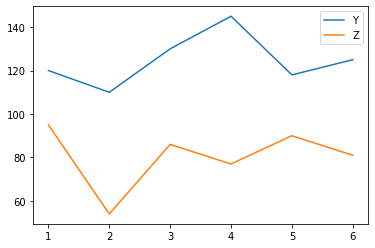

In [4]:
# Criar uma figura e plotar o gráfico incluindo a Legenda Y
fig = plt.figure()
plt.plot(df.X, df.Y, label='Y')
plt.plot(df.X, df.Z, label='Z')
plt.legend()
plt.show()


## Separando em 2 gráficos
- Como argumento do plt.subplots podemos passar o número de linhas e colunas que queremos no nosso plot
    - `plt.subplots(nrows= ,ncols= )`
- Nesse caso vamos precisar passar um índice para o ax (`ax[0], ax[1]`)

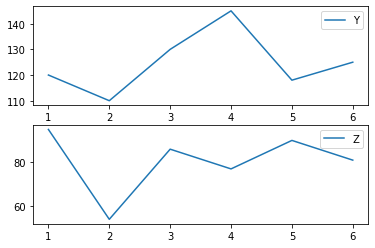

In [5]:
# figura com 2 gráficos, um em cima do outro
fig, ax = plt.subplots(2)

# no decorrer do trabalho, serão consideradas as seguintes coordenadas para os gráficos:
## gráfico 1: (X, Y)
## gráfico 2: (X, Z)
ax[0].plot(df.X, df.Y, label='Y')
ax[1].plot(df.X, df.Z, label='Z')

# exibindo a legenda para todos os gráficos
for i in ax:
    i.legend()


plt.show()

## Melhorando a visualização
- Para aumentar o tamanho do gráfico podemos usar o `figsize=(x,y)`
- Se quisermos mudar a proporção dos gráficos, podemos usar o `gridspec_kw={'height_ratios': []}`

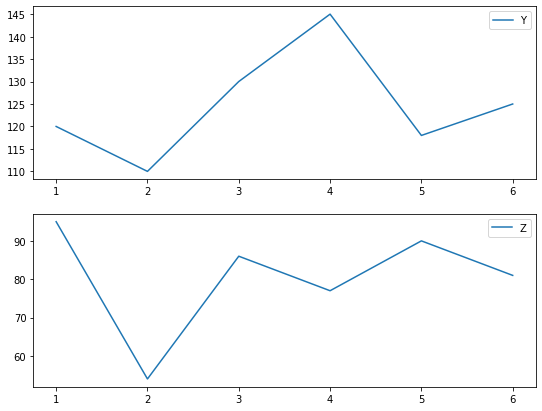

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(9, 7), gridspec_kw={'height_ratios': [4, 4]})
ax[0].plot(df.X, df.Y, label='Y')
ax[1].plot(df.X, df.Z, label='Z')
for i in ax:
    i.legend()
fig.show()

## Alterando o tipo de gráfico para Barras e visualizando em duas colunas

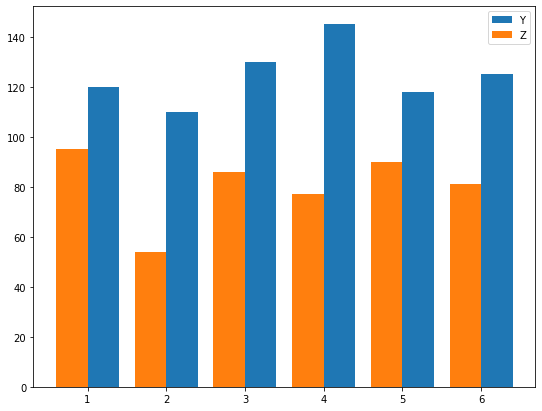

In [37]:
fig, ax = plt.subplots(figsize=(9, 7))

# alterando para gráfico de barra
# considerando cada coluna uma das barras
# visualizando as colunas lado a lado
ax.bar(df.X, df.Y, width=0.4, align='edge', label='Y')
ax.bar(df.X, df.Z, width=-0.4, align='edge', label='Z')
ax.legend()
plt.show()

## Vamos ajustar as barras para ficarem lado a lado
- Vamos definir a largura das barras
    - https://matplotlib.org/stable/plot_types/basic/bar.html
- Depois vamos deslocar o gráfico para os lados

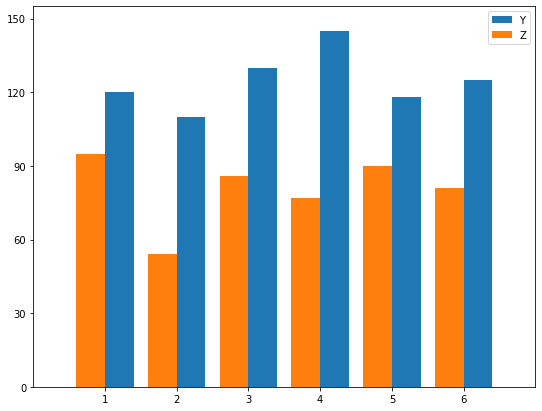

In [135]:
import numpy as np

fig, ax = plt.subplots(figsize=(9, 7))
ax.bar(df.X, df.Y, width=0.4, align='edge', label='Y')
ax.bar(df.X, df.Z, width=-0.4, align='edge', label='Z')
ax.legend()

# encontrando o valor maximo do eixo y
y_lim = max(max(df.Y), max(df.Z))

# configurando para as barras ficarem lado a lado
ax.set(xlim=(0, len(df.index) + 1), xticks=np.arange(1, len(df.index) + 1),
       ylim=(0, y_lim + 10), yticks=np.arange(0, y_lim + 10, 30))

plt.show()

## Colocando rótulo nos dados
- Para isso, vamos usar o `annotate`
    - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html
    - Para usar o annotate, vamos passar `.annotate("<Texto>",<posicao(x,y)>)`
- Podemos posicionar o annotate exatamente em cima da barra usando a posição y
- Usando o `for`, é possível aplicar o annotate para todas as barras
- Por fim, vamos usar os parâmetros do annotate para melhorar a visualização
    - ha         -> alinhamento horizontal
    - xytext     -> deslocamento x,y do texto em relação a um referencial
    - textcoords -> referencial que vamos fazer o deslocamento acima
    - fontsize   -> tamanho da fonte
    - fontweight -> colocando em negrito

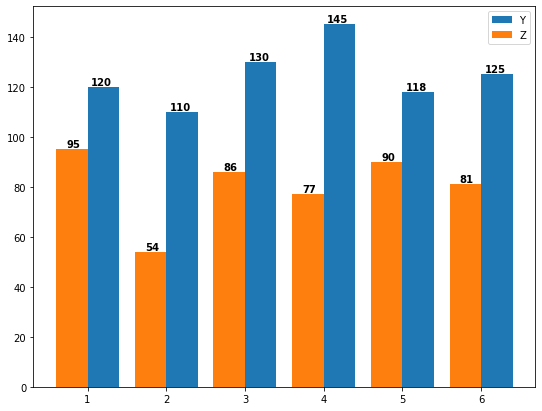

In [136]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.bar(df.X, df.Y, width=0.4, align='edge', label='Y')
ax.bar(df.X, df.Z, width=-0.4, align='edge', label='Z')
ax.legend()

# rotulando todas as barras
for i in range(len(df.index)):
    ax.annotate(df.Y[i], (df.X[i], df.Y[i]), ha='center', xytext=(df.X[i] + 0.18, df.Y[i] + 0.75), fontweight='bold')
    ax.annotate(df.Z[i], (df.X[i], df.Z[i]), ha='center', xytext=(df.X[i] - 0.18, df.Z[i] + 0.75), fontweight='bold')

plt.show()

## Ajustando o eixo y para melhorar a visualização dos rótulos
- O `.set_yticks` vai permitir que alterar o intervalo do eixo y
- O `.yaxis.set_visible` permite que os valores do eixo y não fiquem visíveis

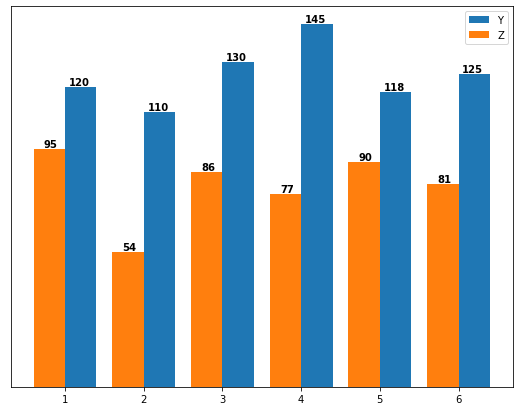

In [137]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.bar(df.X, df.Y, width=0.4, align='edge', label='Y')
ax.bar(df.X, df.Z, width=-0.4, align='edge', label='Z')
ax.legend()

for i in range(len(df.index)):
    ax.annotate(df.Y[i], (df.X[i], df.Y[i]), ha='center', xytext=(df.X[i] + 0.18, df.Y[i] + 0.75), fontweight='bold')
    ax.annotate(df.Z[i], (df.X[i], df.Z[i]), ha='center', xytext=(df.X[i] - 0.18, df.Z[i] + 0.75), fontweight='bold')

# configurando intervalo do eixo y
ax.set_yticks((0, 150))
# ocultando os valores do eixo y
ax.yaxis.set_visible(False)

plt.show()

## Retirando bordas do gráfico
- Usando o `.spines[].set_visible(False)` é possível retirar as bordas de um gráfico

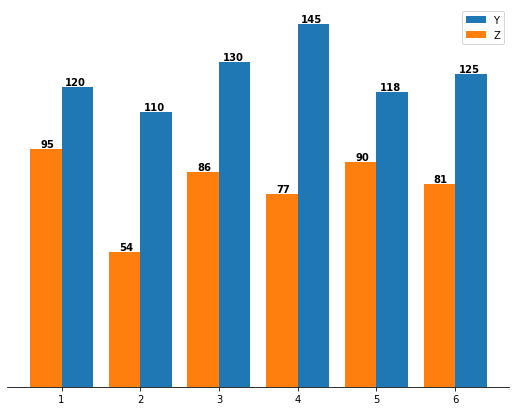

In [138]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.bar(df.X, df.Y, width=0.4, align='edge', label='Y')
ax.bar(df.X, df.Z, width=-0.4, align='edge', label='Z')
ax.legend()

for i in range(len(df.index)):
    ax.annotate(df.Y[i], (df.X[i], df.Y[i]), ha='center', xytext=(df.X[i] + 0.18, df.Y[i] + 0.75), fontweight='bold')
    ax.annotate(df.Z[i], (df.X[i], df.Z[i]), ha='center', xytext=(df.X[i] - 0.18, df.Z[i] + 0.75), fontweight='bold')

ax.set_yticks((0, 150))
ax.yaxis.set_visible(False)

# ocultando algumas bordas
for spine in ['right', 'top', 'left']:
    ax.spines[spine].set_visible(False)


plt.show()

## Separando realizado de projetado 
- Podemos cada gráfico em 2 gráficos diferentes para fazer o realizado e o projetado, mudando as cores das barras
- Cores: azul (#C6F0F5) e laranja (#FFC174)

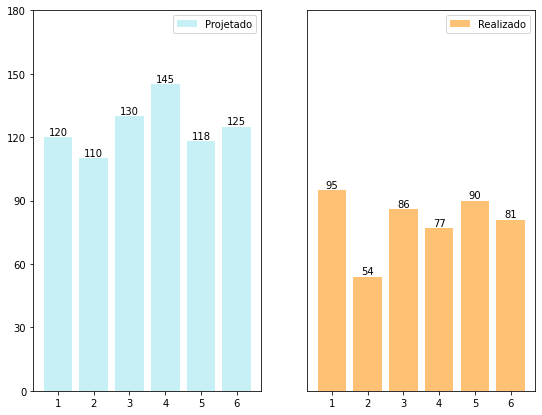

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(9, 7))
ax[0].bar(df.X, df.Y, label='Projetado', color='#C6F0F5')
ax[1].bar(df.X, df.Z, label='Realizado', color='#FFC174')

# aplicando algumas configurações para cada grafico
for i in ax:
    i.legend()
    i.set_yticks([i for i in range(0, 181, 30)]) # configura as etiquetas para o intervalo [0, 181) quando i % 30 = 0
    
    # para simplificar as operações, chamaremos os valores do eixo x simplesmente de x
    # e do eixo y simplesmente de y
    x = df.X

    # caso seja o primeiro gráfico, os valores de y correspondem a df.Y;
    # senão, y = df.Z
    if i == ax[0]:
        y = df.Y
    else:
        y = df.Z

        # para ficar visualmente mais agradável
        # iremos ocultar os valores do eixo y no segundo gráfico
        i.yaxis.set_visible(False)

    # nesse loop, a atribuição de variáveis para os valores dos eixos x e y tornaram
    # o processo de adicionar rotulos mais simples, sendo aplicada a mesma linha
    # de codigo para a rotulagem de ambos os gráficos
    for j in range(len(x)):
        i.annotate(y[j], (x[j], y[j]), ha='center', xytext=(x[j], y[j] + 1))

plt.show()